In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

# Import custom function
import utils_tp

    # Import audio tools
from IPython.display import Audio

# Plot figure inside notebook
%matplotlib inline

    # For external code
%load_ext autoreload
%autoreload 2

In [2]:
# Matlab < - > Python
# M = zeros(10, 10)
M = np.zeros([10, 10])

# a:b
np.arange(5, 7)

# size(M)
M.shape

for i in np.arange(1, 3):
    print(i)

1
2


## Exercice 1 : Detect a template of rectangular signal

In [8]:
Fe = 8192.;  # Sampling frequency
Nx = 1024;  # number of sample

t_patern = np.arange(-Nx / 2, Nx / 2) / Fe

In [12]:
np.arange(-Nx / 2, Nx / 2)

array([-512., -511., -510., ...,  509.,  510.,  511.])

In [11]:
Nx / 2

512.0

In [13]:
t_patern.shape

(1024,)

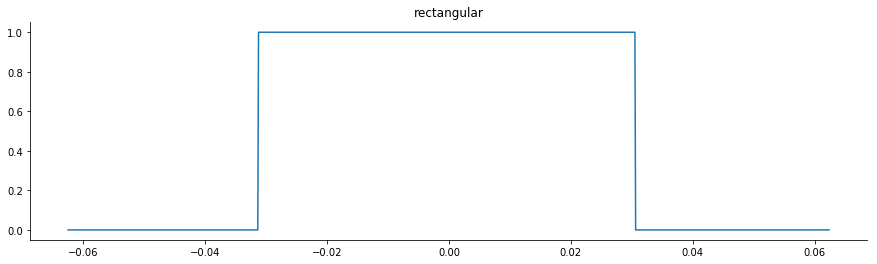

In [15]:
x1 = np.zeros(t_patern.shape);  # vector initialised by 0 
x1[256:763] = 1 ;     #  "1" for the window. 



# Three subplots sharing both x/y axes
f, ax = plt.subplots(sharey=True, figsize=(15, 4))
ax.plot(t_patern, x1)
ax.set_title('rectangular')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()

** Synthetyse signal from pattern and noise **

The following function permits to synthetyse a signal as followed : a pattern is repeted at random location (referred to as event) and a white gaussian noise of variance $\sigma^2$ is added.
The arguments of the function *synthese_signal* are
- x, the pattern,
- N the number of events,
- sigma2, the noise variance,
- T, the signal duration
- Fe, the sampling frequency.

Outputs are
- z, the synthetised noisy signal,
- time, the vector of time samples,
- P, the true position of event,
- z_pur, the true signal without noise.

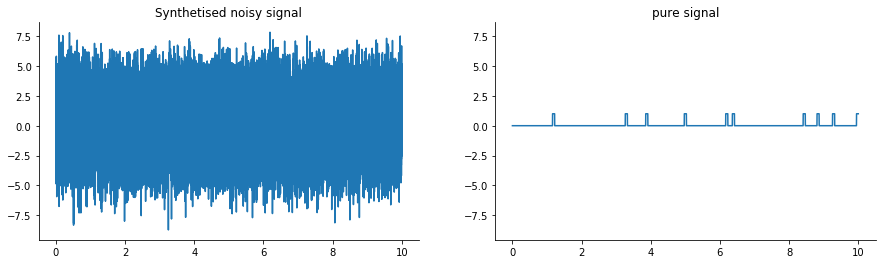

In [71]:
N = 10
sigma2_noise = 4
z, Ptrue, t, _ = utils_tp.synthetise_signal(x1, N, sigma2_noise)

** Filter signal from noising signal and known template **

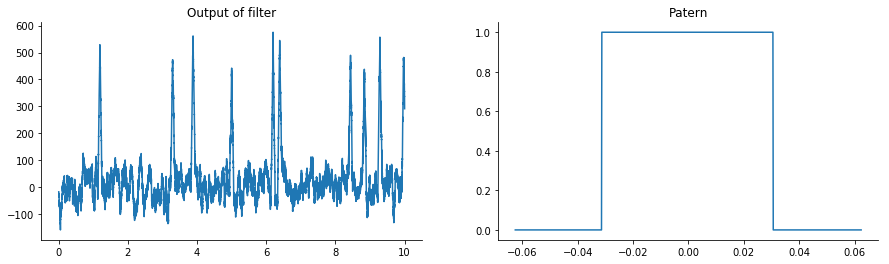

In [72]:
y = utils_tp.filtering(z, x1)

** Thresholding of the filtered signal **

C:\Users\Bouba\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'linestyle'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


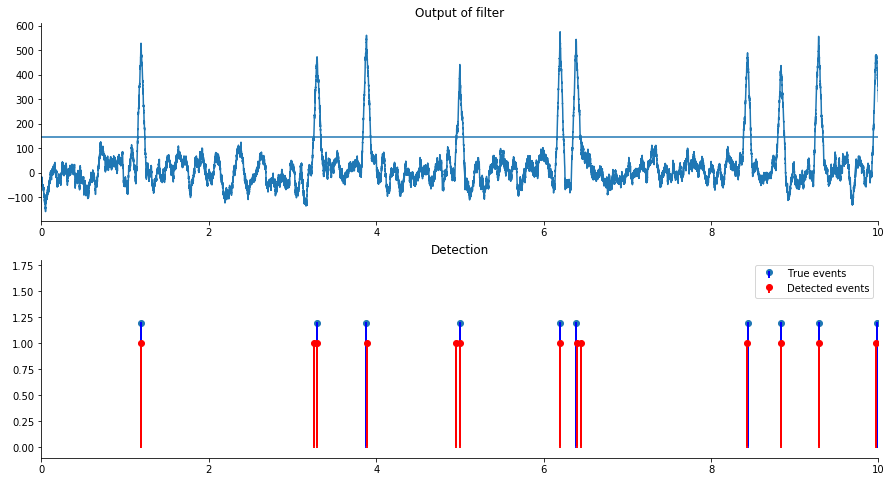

In [74]:
threshold = 145
P = utils_tp.detect_events(y, threshold, Ptrue)

## Exercice 2 : Matched filter or not

All paterns are windowed signal.
- The first pattern is rectangular.
- The second pattern is triangular.
- The third pattern is sinusoidal.

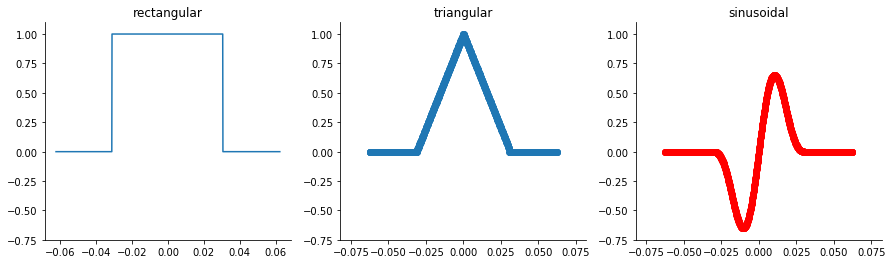

In [40]:
x1 = np.zeros(t_patern.shape)  
x1[256:763] = 1    

x2 = np.zeros(t_patern.shape)
x2[256:512] = 1 + t_patern[256:512] * Fe / 256
x2[512:763] = 1 - t_patern[512:763] * Fe / 256

x3 = np.zeros(t_patern.shape)
x3[256:763] = (1 + np.cos(2*np.pi*Fe/512*t_patern[256:763]))/2 * np.sin(2*np.pi*Fe/512*t_patern[256:763])

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 4))

ax1.plot(t_patern, x1)
ax1.set_title('rectangular')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')


ax2.scatter(t_patern, x2)
ax2.set_title('triangular')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

ax3.scatter(t_patern, x3, color='r')
ax3.set_title('sinusoidal')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticks_position('left')

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.show()

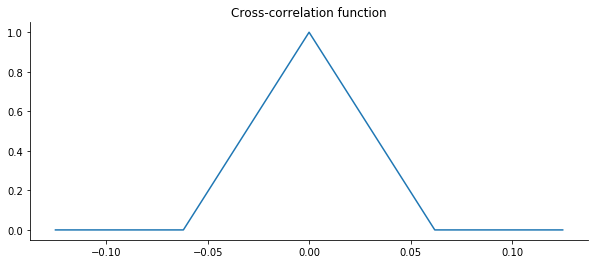

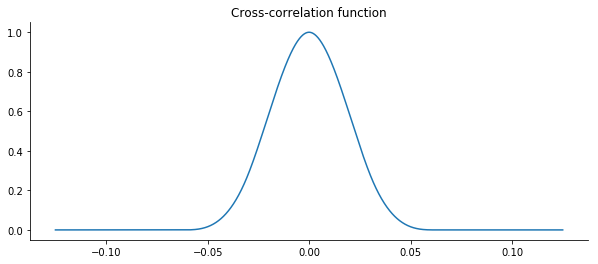

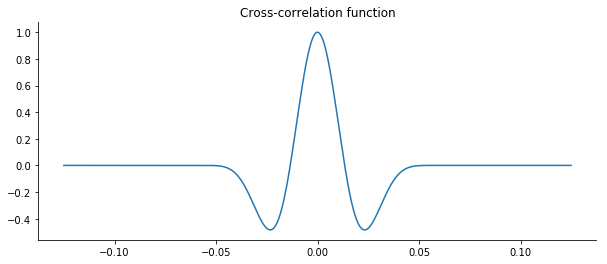

In [46]:
#Insert here the code to compute the autocorrelation of x1, x2, x3
# x1 and x2
utils_tp.crossCorr(x1,x1)
utils_tp.crossCorr(x2,x2)
utils_tp.crossCorr(x3,x3)

** Comment here on the properties of autocorrelation **
- L'autocorrélation est maximale au temps t=0. Cette propriété est toujours vérifiée.
- L'autocorrélation est une fonction symétrique du temps.
- ...

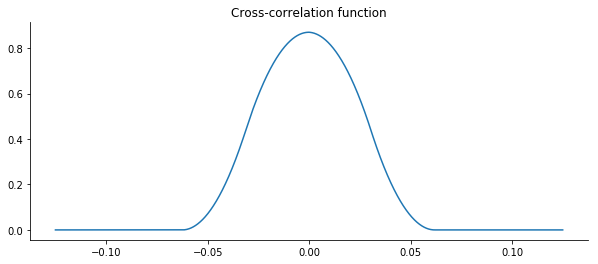

In [47]:
#Insert here the code to compute the cross-correlation between x1&x2
utils_tp.crossCorr(x1,x2)
#
#

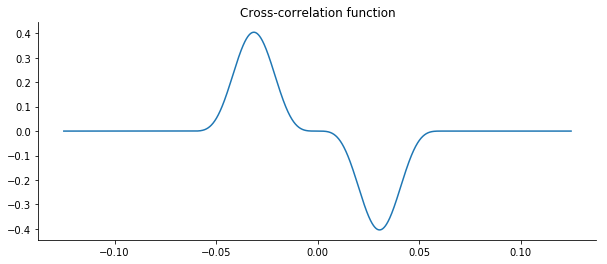

In [48]:
#Insert the code to compute the cross-correlation between x1&x3
utils_tp.crossCorr(x1,x3)
#
#
#

**Comment here on the results observed.**
- 
- What filter do you decide to use? Nous décidons d'utiliser le filtre x2.
- Why ? En effet, c'est l'intercorrélation entre x1 et x2 qui donne un maximum de 0,9 tandis que celle de x1 et x3 donne 0,4. Donc x2 est plus corrélé à x1.

## Exercice 3: Detect the beep in a noising signal

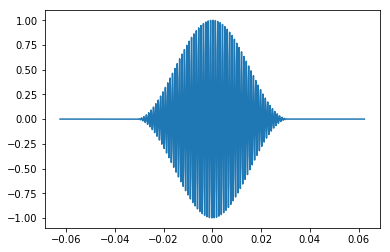

In [116]:
Fe = 8192. 
Nx = 1024 # number of samples of the pattern
t = np.arange(-Nx/2,Nx/2,1) / Fe
freq0 = 1024  # characteristic frequency of the elementary "beep" in Hz.
x4 = utils_tp.motif_bip(freq0,t)

In [117]:
#Listen to the beep.
Audio(x4, rate = Fe)

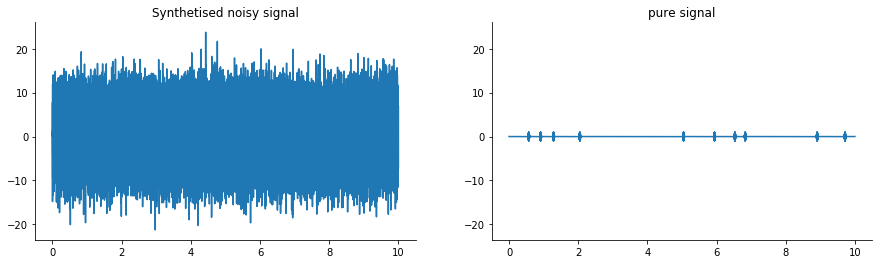

In [118]:
N=10
sigma2 = 25
# Synthetyse signal from pattern x4 and noise
z, Ptrue, t, _ = utils_tp.synthetise_signal(x4, N, sigma2)
#
#

In [119]:
# Listen to noisy signal.
Audio(z,rate=Fe)

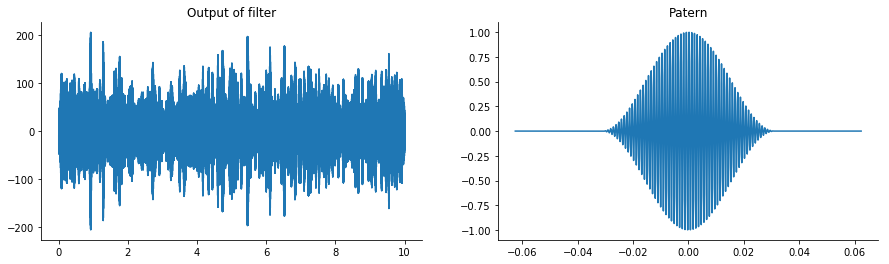

In [120]:
# Filter signal from noising signal and known template (x4 here)
y = utils_tp.filtering(z, x4)
#

C:\Users\Bouba\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'linestyle'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


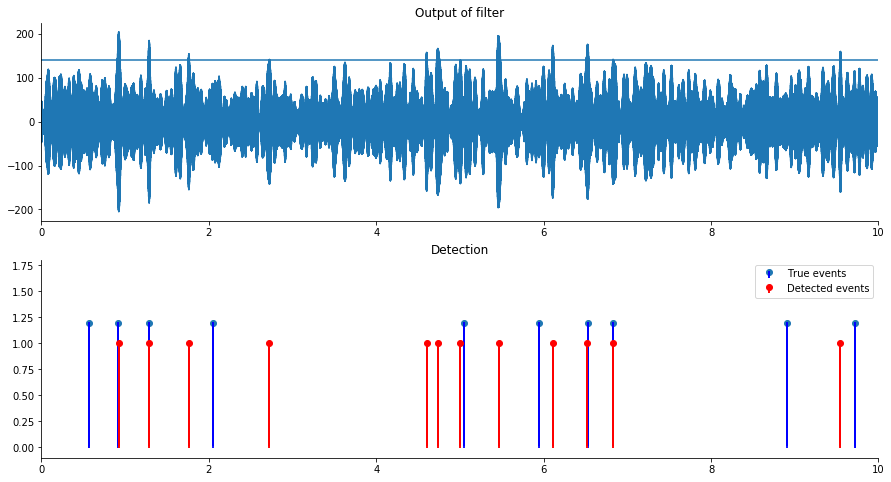

In [123]:
# Thresholding of the filtered signal
threshold = 140
P = utils_tp.detect_events(y, threshold, Ptrue)

** Comment here **
- Nous remarquons que pour sigma2 = 25, le bruit du signal est assez élevé et l'application du filtre n'arrive pas à distinguer clairement les vrais évènements du bruit. Pour une valeur plus faible de sigma (exemple sigma2=2), le filtre permet de détecter très clairement les pics correspondant aux vrais motifs.  
- On remarque que si le seuil est grand, on détecte certains bons évènements (taux de bonne détection assez élevé) au prix d'en perdre quelque uns qui n'ont pas un pic très énoncé après l'application du filtre. Par contre, si le seuil est petit on détecte plusieurs faux évènements (taux de fausse alarme élevé). 
- Lorsque la variance du bruit sigma2 est grand, il est difficile de trouver un intervalle optimal de la valeur de seuil pour détecter tous les évènements réels.

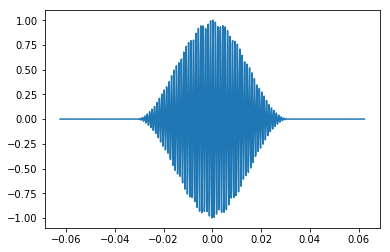

In [148]:
#Create another beep pattern (x4bis) with another characteristic frequency
Fe = 8192. 
Nx = 1024 # number of samples of the pattern
t = np.arange(-Nx/2,Nx/2,1) / Fe
freq0 = 1000  # characteristic frequency of the elementary "beep" in Hz.
x4bis = utils_tp.motif_bip(freq0,t)

In [150]:
#Listen to the beep.
Audio(x4bis, rate = Fe)

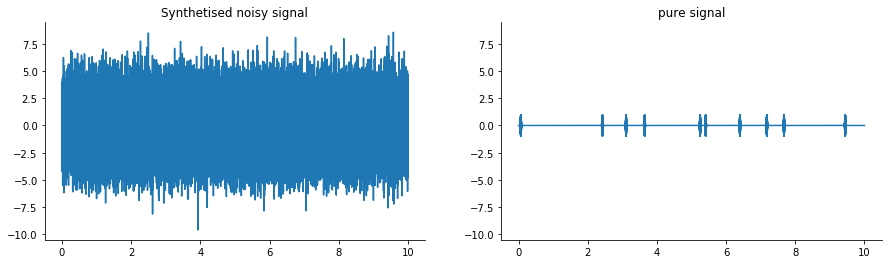

In [151]:
N=10
sigma2 = 4
# Synthetyse signal from pattern x4bis and noise
zbis, Ptrue, t, _ = utils_tp.synthetise_signal(x4bis, N, sigma2)

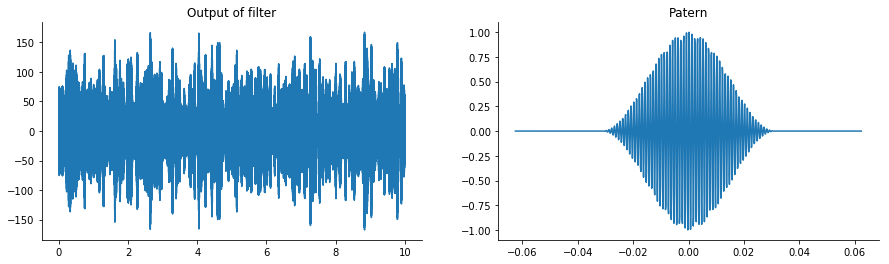

In [152]:
# Filter signal from noising signal (with pattern x4) and template x4bis
ybis = utils_tp.filtering(z, x4bis)

C:\Users\Bouba\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'linestyle'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


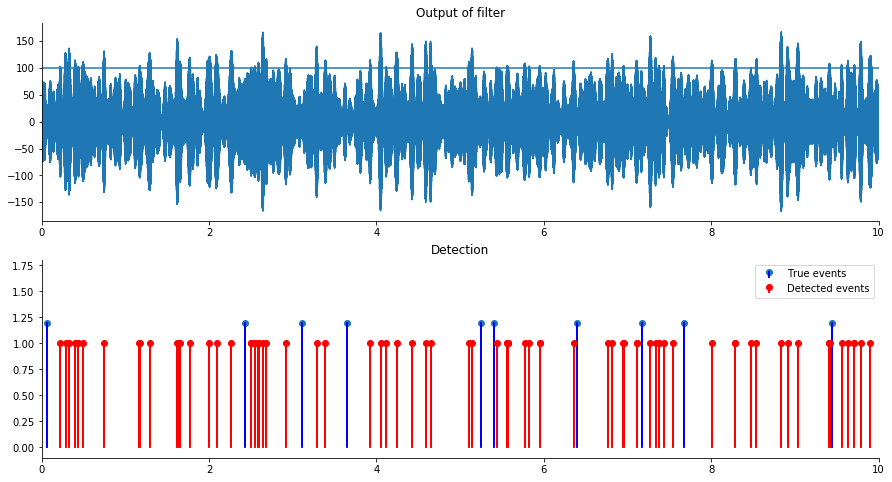

In [154]:
# Thresholding of the filtered signal
threshold = 100
P = utils_tp.detect_events(ybis, threshold, Ptrue)

** Comment here **
- ...
- ...
- ...

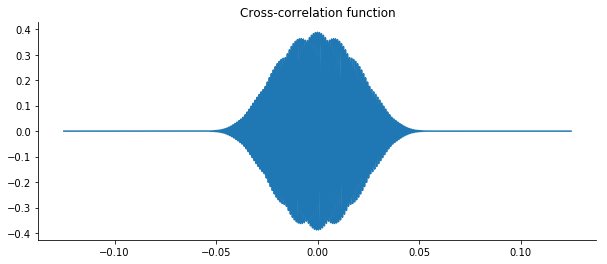

In [149]:
utils_tp.crossCorr(x4,x4bis)